# Table contents
### I. Introduction<br>
1a. Prepare data<br>
### II. Exploring the Data<br>
2a. Statistical Overview<br>
2b. Correlation Matrix & Heatmap<br>
2c. Statistical Test for Correlation<br>
2d. Distribution Plots (Satisfaction - Evaluation - Income)<br>
2e. Department V.S. Attrition<br>
2f. Overtime V.S. Attrition<br>
2g. Evaluation vs Attrition<br>
### III. Conclusion<br>
### IV. References


# I. Introduction
Dữ liệu phân tích nhân sự IBM về độ hụt giảm (attrition) và khả năng làm việc trong công ty (performance)
Ở phần báo cáo này, chúng ta sẽ tập trung vào những câu hỏi quan trọng:
- Những nhân tố nào đang đóng vai trò trong tỷ lệ suy giảm?
- Những nhân tố nào đang đóng vao trò trong tỷ lệ hài lòng?
- Khi nào thì nhân viên bỏ đi?

Để giải quyết các câu hỏi này, thì notebook này sẽ bao gồm phần khám phá dữ liệu, minh họa, lọc dữ liệu,phân tích trên t-test/ f-test và đưa ra kết luận.

# Prepare data
**Import những libraries cần thiết và tải dữ liệu**

In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [261]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [262]:
# Check to see if there are any missing values in our data set
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Dữ liệu không có missing value

In [263]:
# Renaming certain columns for better readability
df = df.rename(columns={"DistanceFromHome" : "Distance",
                       "MonthlyIncome": "Income",
                       "PerformanceRating":"Evaluation",
                       "JobSatisfaction" : "Satisfaction"})

In [264]:
# Move the reponse variable "Attrition" and "Satisfaction" to the front of the table
first = df['Attrition']
second = df["Satisfaction"]
df.drop(labels=['Attrition'], axis=1,inplace = True)
df.drop(labels=['Satisfaction'], axis=1,inplace = True)
df.insert(0, 'Attrition', first)
df.insert(1, 'Satisfaction', second)
df.head()

,Attrition,Satisfaction,Age,BusinessTravel,DailyRate,Department,Distance,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,4,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,No,2,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,Yes,3,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,No,3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,No,2,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [265]:
df['Attrition'].describe()

count     1470
unique       2
top         No
freq      1233
Name: Attrition, dtype: object

In [266]:
# Define a dictionary for the target mapping
target_map = {'Yes':1, 'No':0}
# Use the pandas apply method to numerically encode our attrition target variable
df["Attrition"] = df["Attrition"].apply(lambda x: target_map[x])
df.head(3)

,Attrition,Satisfaction,Age,BusinessTravel,DailyRate,Department,Distance,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,4,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,0,2,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1,3,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0


# II. Exploring the Data

**2a Statistical Overview**

In [267]:
# The dataset contains 35 columns and 1470 observations
df.shape

(1470, 35)

In [268]:
# Looks like about 83.9% of employees stayed and 16.1% of employees left. 
# NOTE: When performing cross validation, its important to maintain this turnover ratio
attrition_rate = df["Attrition"].value_counts() / len(df)
attrition_rate

0    0.838776
1    0.161224
Name: Attrition, dtype: float64

Tỷ lệ nhân viên ra đi là 16.1%

Theo cảm quan ta chọn ra một số features có thể ảnh hưởng đến Attrition và Satisfaction

- Age (tuổi)
- Distance (khoảng đường đi từ nhà đến chỗ làm)
- Gender (giới tính)
- Income (lương tháng)
- Evaluation (đánh giá hiệu quả làm việc)
- OverTime (làm quá giờ)
- YearsAtCompany(số năm làm việc tại công ty)
- Department (nhóm ngành)

In [269]:
new_df = df[["Attrition", "Satisfaction","Age","Distance","Gender", "Income",\
            "Evaluation", "OverTime", "YearsAtCompany", "Department" ]]

In [270]:
# Display the statistical overview of the employees
new_df.describe()

,Attrition,Satisfaction,Age,Distance,Income,Evaluation,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.161224,2.728571,36.923810,9.192517,6502.931293,3.153741,7.008163
std,0.367863,1.102846,9.135373,8.106864,4707.956783,0.360824,6.126525
min,0.000000,1.000000,18.000000,1.000000,1009.000000,3.000000,0.000000
25%,0.000000,2.000000,30.000000,2.000000,2911.000000,3.000000,3.000000
50%,0.000000,3.000000,36.000000,7.000000,4919.000000,3.000000,5.000000
75%,0.000000,4.000000,43.000000,14.000000,8379.000000,3.000000,9.000000
max,1.000000,4.000000,60.000000,29.000000,19999.000000,4.000000,40.000000


Độ thỏa mãn trung bình của nhân viên là **2.73** (chấm theo thang từ 1 đến 4, trong đó 1 là low và 4 là very high)

In [271]:
# Overview of summary (Attrition V.S. Non-attrition)
attrition_Summary = new_df.groupby('Attrition')
attrition_Summary.mean()

,Satisfaction,Age,Distance,Income,Evaluation,YearsAtCompany
Attrition,,,,,,
0,2.778589,37.561233,8.915653,6832.739659,3.153285,7.369019
1,2.468354,33.607595,10.632911,4787.092827,3.156118,5.130802


Sau khi đánh giá sơ bộ về những người mang độ hụt giảm (attrition = Yes) và những người không có (attrition = No). Ta nhận thấy:
- Độ thỏa mãn về công việc của người ở lại cao hơn người ra đi.
- Những người ra đi quãng đường từ nhà đến chỗ làm xa hơn.
- Những người ra đi nhận mức lương (tháng) thấp hơn.

**2b. Correlation Matrix & Heatmap**

,Attrition,Satisfaction,Age,Distance,Income,Evaluation,YearsAtCompany
Attrition,1.000000,-0.103481,-0.159205,0.077924,-0.159840,0.002889,-0.134392
Satisfaction,-0.103481,1.000000,-0.004892,-0.003669,-0.007157,0.002297,-0.003803
Age,-0.159205,-0.004892,1.000000,-0.001686,0.497855,0.001904,0.311309
Distance,0.077924,-0.003669,-0.001686,1.000000,-0.017014,0.027110,0.009508
Income,-0.159840,-0.007157,0.497855,-0.017014,1.000000,-0.017120,0.514285
Evaluation,0.002889,0.002297,0.001904,0.027110,-0.017120,1.000000,0.003435
YearsAtCompany,-0.134392,-0.003803,0.311309,0.009508,0.514285,0.003435,1.000000


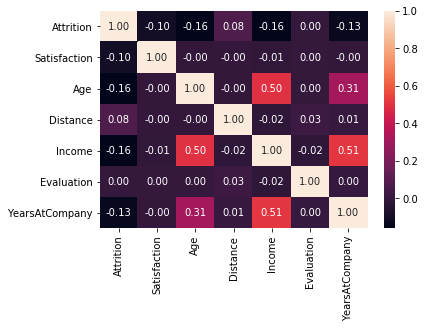

In [272]:
#Correlation Matrix
corr = new_df.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           annot=True, fmt=".2f")

corr

Những mối tương quan đồng biến:
- Income vs Age: **0.5**
- Income vs YearsAtCompany: **0.51**
- Age vs YearsAtCompany: **0.31**

Nhân viên lớn tuổi thì lương cao hơn.<br>
Thâm niên cao thì lương cao hơn.<br>
Nhân viên lớn tuổi gắn bó với công ty hơn.

**2c. Statistical Test for Correlation**

Pop1: những người ra đi<br>
Pop2: những người ở lại

Đây là 2 biến độc lập nên ta dùng **Independent Samples T-Test**

**Hypothesis Testing 01:** Liệu có sự khác biệt về mức độ thỏa mãn(satisfaction) giữa những nhân viên ra đi (attrition = yes) và những nhân viên ở lại (attrition = no)?<br>
- **Null Hypothesis (H0)**: Mức độ thỏa mãn giữa những người ra đi và những người ở lại là bằng nhau
- **Alternate Hypothesis (H1):** Có sự khác biệt về mức độ thỏa mãn giữa những người ra đi và những người ở lại

Chọn alpha =0.05 (với mức tin cậy 95%)

In [273]:
import scipy.stats as stats
result = stats.ttest_ind(df[df["Attrition"]==1]['Satisfaction'],
                               df[df["Attrition"]==0]['Satisfaction'])
result

Ttest_indResult(statistic=-3.9862267630568273, pvalue=7.043066741731151e-05)

In [274]:
alpha = 0.05
n = len(df[df['Attrition']==1])
degree_freedom_n = n -1
m = len(df[df['Attrition']==0])
degree_freedom_m= m -1
degree_freedom_total = degree_freedom_n + degree_freedom_m
t_critical = stats.t.ppf(1-alpha/2, degree_freedom_total) # Because it has 2 tails
def compare_t_critical(n):
    """So sánh t của result và t critical rồi đưa ra kết luận"""
    if abs(n.statistic) > t_critical:
        print("Reject H0")
    else:
        print("Reject H1. Chấp nhận H0 với mức ý nghĩa", 1-n.pvalue)

In [275]:
compare_t_critical(result) #check

Reject H0


**Kết luận:** Có sự khác biệt trong sự thỏa mãn công việc giữa người ra đi và người ở lại. Với mức tin cậy >95%

**Hypothesis Testing 02:** Liệu có sự khác biệt về quãng đường đi làm (distance) giữa những nhân viên ra đi (attrition = yes) và những nhân viên ở lại (attrition = no)?<br>
- **Null Hypothesis (H0)**: Quãng đường đi làm giữa những người ra đi và những người ở lại là bằng nhau.
- **Alternate Hypothesis (H1):** Có sự khác biệt về quãng đường đi làm giữa những người ra đi và những người ở lại

In [276]:
result = stats.ttest_ind(df[df["Attrition"]==1]['Distance'],
                               df[df["Attrition"]==0]['Distance'])
result

Ttest_indResult(statistic=2.994708098265125, pvalue=0.0027930600802134266)

In [277]:
compare_t_critical(result) #check

Reject H0


**Kết luận:** Có sự khác biệt về khoảng cách từ nhà đến nơi làm giữa những người ra đi và những người ở lại. Với độ tin cậy >95%

**2d. Distribution Plots (Satisfaction - Evaluation - Income)**

Text(0, 0.5, 'Employee Count')

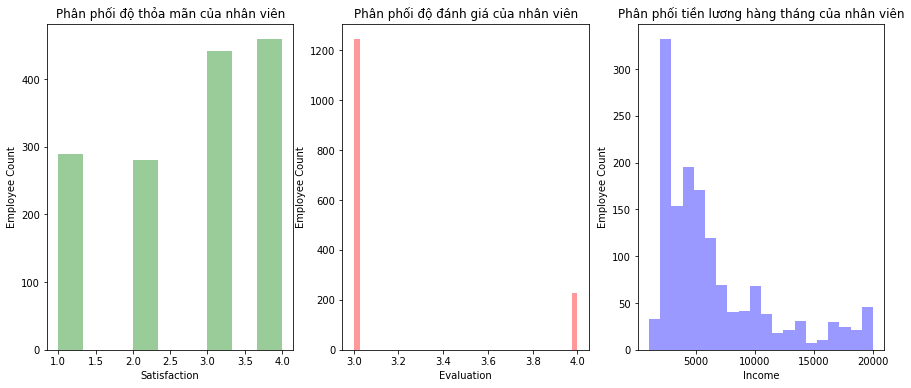

In [278]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# Graph Employee Satisfaction
sns.distplot(new_df.Satisfaction, kde=False, color="g", ax=axes[0]).set_title('Phân phối độ thỏa mãn của nhân viên')
axes[0].set_ylabel('Employee Count')

# Graph Employee Evaluation
sns.distplot(new_df.Evaluation, kde=False, color="r", ax=axes[1]).set_title('Phân phối độ đánh giá của nhân viên')
axes[1].set_ylabel('Employee Count')

# Graph Employee Income per month
sns.distplot(new_df.Income, kde=False, color="b", ax=axes[2]).set_title('Phân phối tiền lương hàng tháng của nhân viên')
axes[2].set_ylabel('Employee Count')

Ta thấy được:
- Hầu hết nhân viên cảm thấy thỏa mãn cao (2 cột cao bên phải)
- Hầu hết nhân viên được đánh giá mức năng lực là 3, chỉ có một số nhỏ khoảng hơn 200 là ở mức năng lực là 4
- Tiền lương hàng tháng hầu hết ở mức dưới 5000

**2e. Department V.S. Attrition**


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

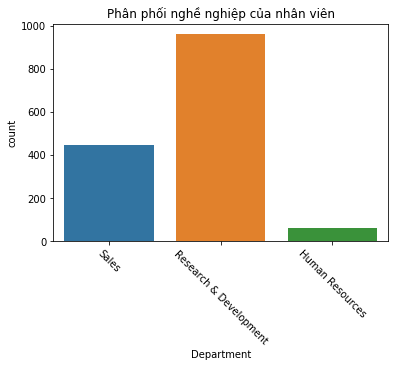

In [279]:
sns.countplot(x='Department', data=new_df).set_title('Phân phối nghề nghiệp của nhân viên');
 
# Rotate x-labels
plt.xticks(rotation=-45)

Chủ yếu họ làm trong mảng R&D: nghiên cứu và phát triển

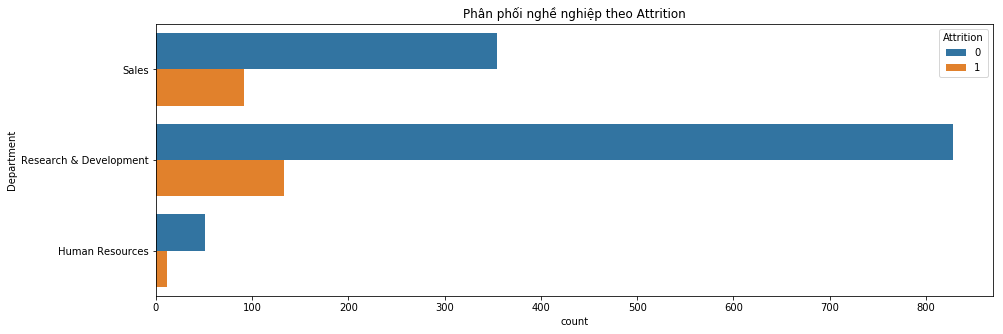

In [280]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y='Department', hue='Attrition', data=new_df).set_title('Phân phối nghề nghiệp theo Attrition');

Những người ra đi nằm trong mảng R&D là nhiều nhất. Điều này là bình thường bởi theo phân phối nghề nghiệp nhân viên ở trên, nhân sự làm trong mảng này là nhiều nhất.

In [281]:
df[df['Attrition']== 1]['Department'].describe()

count                        237
unique                         3
top       Research & Development
freq                         133
Name: Department, dtype: object

**2f. Overtime V.S. Attrition**

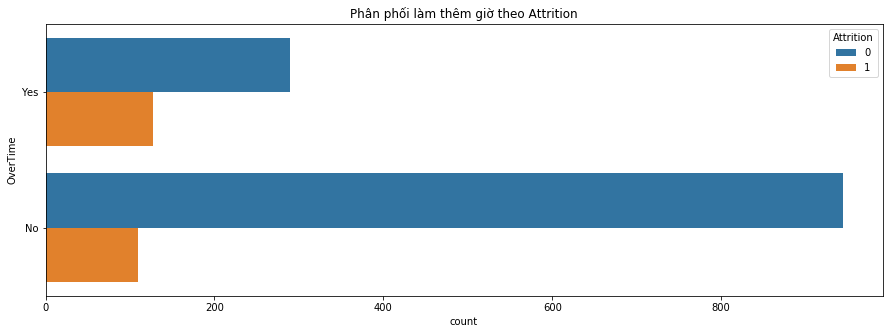

In [282]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="OverTime", hue='Attrition', data=new_df).set_title('Phân phối làm thêm giờ theo Attrition');

Nhìn biểu đồ ta thấy số lượng nhân viên ra đi có làm ngoài giờ thì nhiều hơn hẳn so với những người ra đi mà không làm ngoài giờ. Chưa kể xét theo tổng thể của số nhân sự làm/không làm ngoài giờ.

In [283]:
df[df['Attrition']== 1]['OverTime'].describe()

count     237
unique      2
top       Yes
freq      127
Name: OverTime, dtype: object

**2f. Gender V.S. Attrition**

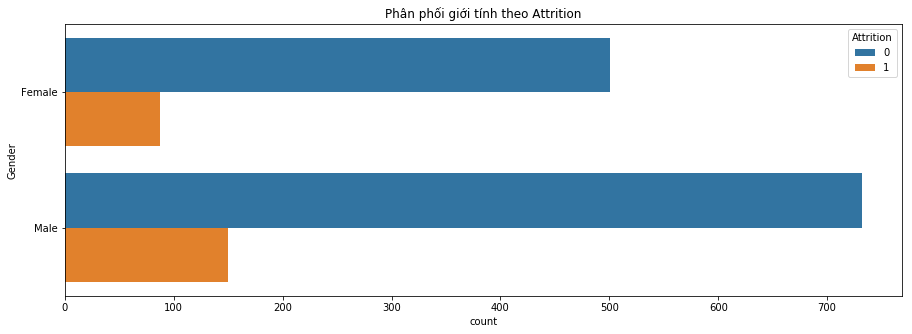

In [284]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="Gender", hue='Attrition', data=new_df).set_title('Phân phối giới tính theo Attrition');

Nhìn biểu đồ ta thấy nam nghỉ việc nhiều hơn nữ.

In [285]:
df[df['Attrition']== 1]['Gender'].describe()

count      237
unique       2
top       Male
freq       150
Name: Gender, dtype: object

**2g. Evaluation vs Attrition**

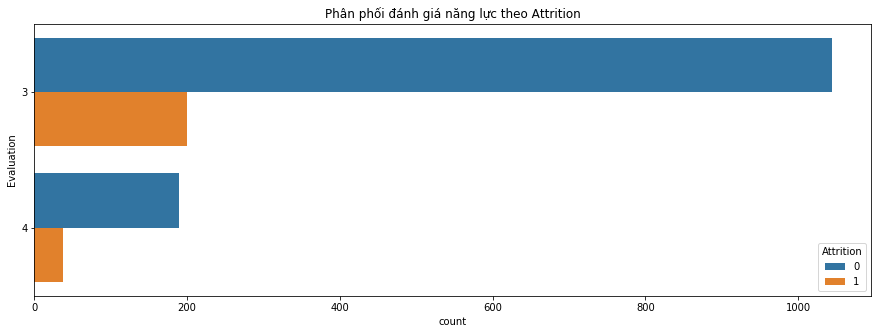

In [286]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="Evaluation", hue='Attrition', data=new_df).set_title('Phân phối đánh giá năng lực theo Attrition');

Ta nhận thấy hầu hết nhân sự ra đi ở mức đánh giá hạng 3.<br>
Những nhân sự ở mức đánh giá hạng 4 thì ít rời đi hơn

# III. Conclusion

Qua các phần đánh giá số liệu ở trên, ta nhận thấy:<br>
- Có sự khác biệt về độ thỏa mãn giữa người ra đi và người ở lại. (t-test)
- Có sự khác biệt về quãng đường từ nhà đến chỗ làm giữa người ra đi và người ở lại. (t-test)
- Nhóm ngành của nhân sự ra đi nhiều nhất là bên **R&D**: **133 người** (visualization)
- Những nhân sự hay làm thêm giờ (overtime) thì ra đi nhiều hơn hẳn những người không làm thêm giờ. Cứ **237** người nghỉ thì **127** người làm OT(visualization)
- Về giới tính, thì nam nghỉ nhiều hơn là nữ. Cứ **237** người nghỉ thì **150** người là nam (visualization)
- Về đánh giá năng lực, thì hầu hết những nhân sự đánh giá mức 3 sẽ ra đi (chỉ có hai mức 3 và 4), trong khi ở mức 4 được đánh giá cao hơn sẽ ít ra đi. (visualization)
- Về tiền lương thì có mức chênh lệch cao, min **1.009** max **20.000** mode **4.919** (data describe)

Và kết luận từ một số đặc điểm tương quan sau: (Correlation Matrix & Heatmap)
- Nhân viên lớn tuổi thì lương cao hơn.
- Thâm niên cao thì lương cao hơn.
- Nhân viên lớn tuổi gắn bó với công ty hơn.

Ta kết luận những nhân tố đóng vai trò trong:<br>
Độ hụt giảm(Attrition) gồm: Satisfaction, Distance, OverTime, Gender<br>
Độ thỏa mãn(Satisfaction) gồm:


# IV. References
[Predicting Employee Kernelover](#https://www.kaggle.com/randylaosat/predicting-employee-kernelover)<br>
[Data Analysis - Tại sao nhân viên bỏ việc](https://viblo.asia/p/data-analysis-tai-sao-nhan-vien-bo-viec-ByEZkW6gZQ0)